# Principal Component Analysis

In [12]:
#Général
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Réduction des dimensions
from sklearn.decomposition import PCA

In [19]:
df_scaled = pd.read_csv("df_scaled.csv",sep=";")
df_scaled

,Pclass,Sex,Age,Fare,Survived
0,0.825209,0.735342,-5.896199e-01,-0.500240,0.0
1,-1.572211,-1.359911,6.448480e-01,0.788947,1.0
2,0.825209,-1.359911,-2.810029e-01,-0.486650,1.0
3,-1.572211,-1.359911,4.133853e-01,0.422861,1.0
4,0.825209,0.735342,4.133853e-01,-0.484133,0.0
...,...,...,...,...,...
884,-0.373501,0.735342,-2.038487e-01,-0.384475,0.0
885,-1.572211,-1.359911,-8.210826e-01,-0.042213,0.0
886,0.825209,-1.359911,-5.482138e-16,-0.174084,0.0
887,-1.572211,0.735342,-2.810029e-01,-0.042213,1.0


In [21]:
X_scaled = df_scaled.iloc[:,:-1]
X_scaled

,Pclass,Sex,Age,Fare
0,0.825209,0.735342,-5.896199e-01,-0.500240
1,-1.572211,-1.359911,6.448480e-01,0.788947
2,0.825209,-1.359911,-2.810029e-01,-0.486650
3,-1.572211,-1.359911,4.133853e-01,0.422861
4,0.825209,0.735342,4.133853e-01,-0.484133
...,...,...,...,...
884,-0.373501,0.735342,-2.038487e-01,-0.384475
885,-1.572211,-1.359911,-8.210826e-01,-0.042213
886,0.825209,-1.359911,-5.482138e-16,-0.174084
887,-1.572211,0.735342,-2.810029e-01,-0.042213


In [22]:
%%time
#On applique l'ACP aux données scalées :
#On normalise les données
pca = PCA(n_components=4)
X_trans_scaled=pca.fit_transform(X_scaled)

CPU times: total: 0 ns
Wall time: 5.99 ms


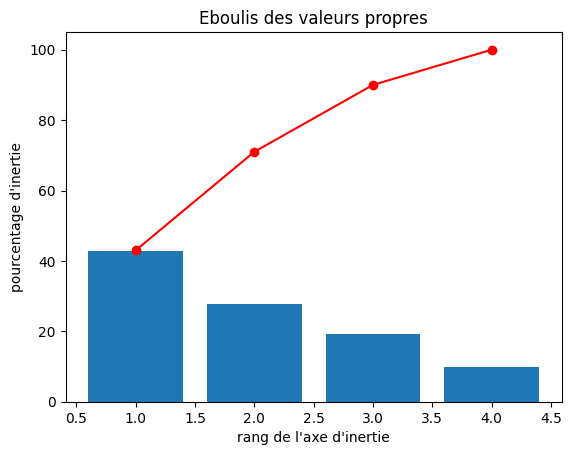

CPU times: total: 281 ms
Wall time: 296 ms


In [23]:
%%time
# Visualisation de l'éboulis des valeurs propres
n_components=4

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [24]:
#La matrice de corrélation ACP
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = X_scaled.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2).T

,F1,F2,F3,F4
Pclass,-0.67,-0.09,-0.12,0.73
Sex,-0.23,0.72,0.65,-0.02
Age,0.35,0.65,-0.59,0.31
Fare,0.61,-0.20,0.46,0.61


CPU times: total: 172 ms
Wall time: 197 ms


<Axes: >

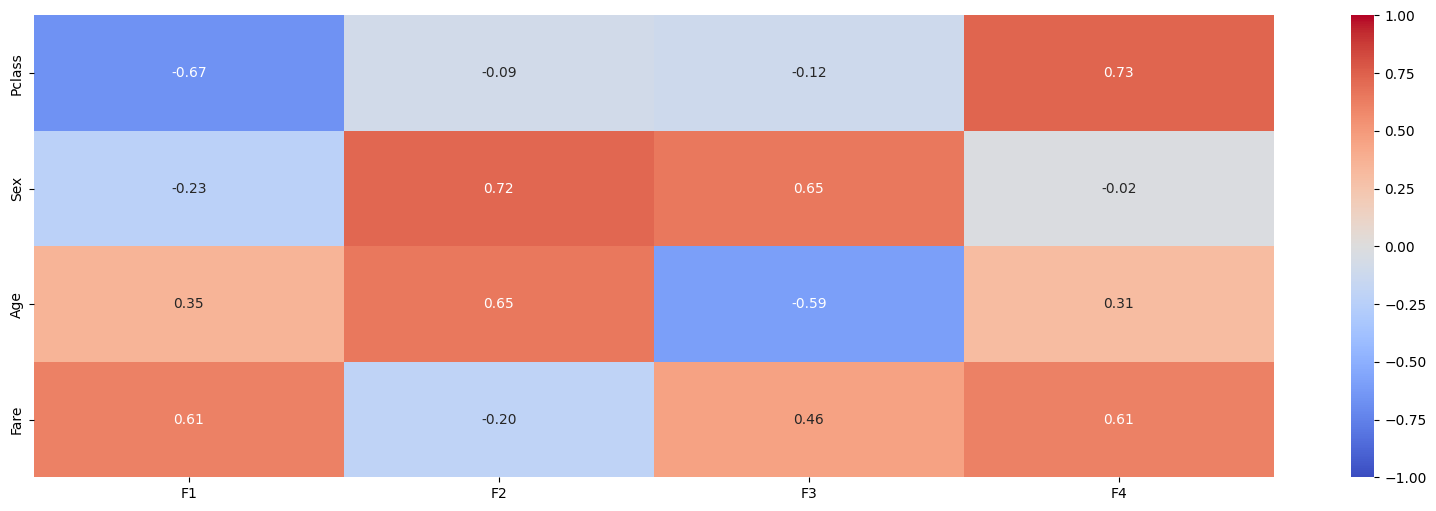

In [25]:
%%time
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [14]:
# La fonction de traçage du cercle de corrélation
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

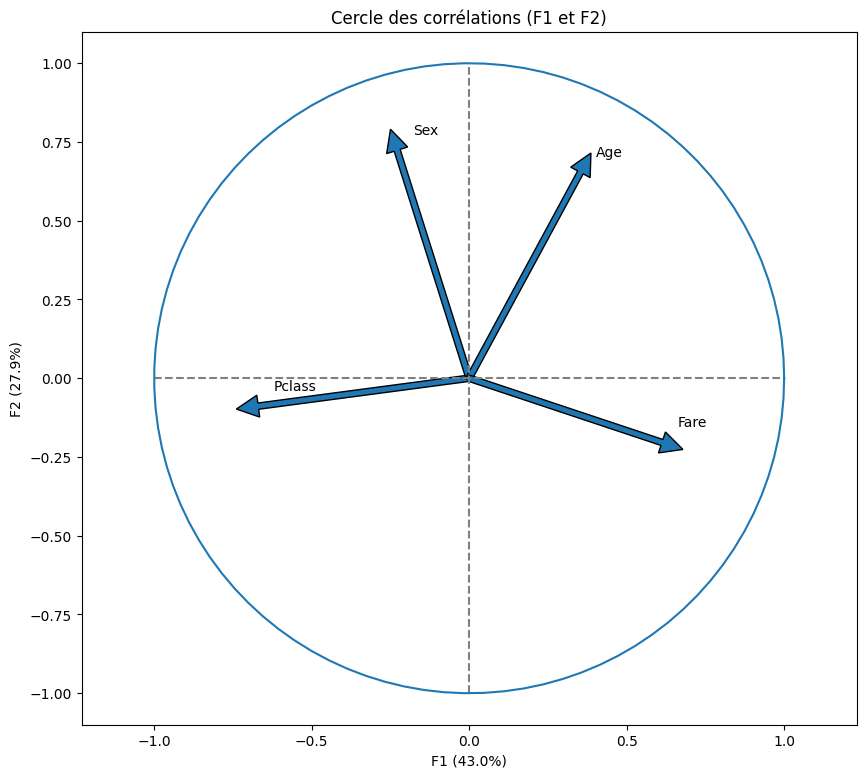

In [26]:
#le cercle de corrélation sur F1-F2
correlation_graph(pca, (0,1), X_scaled.columns)

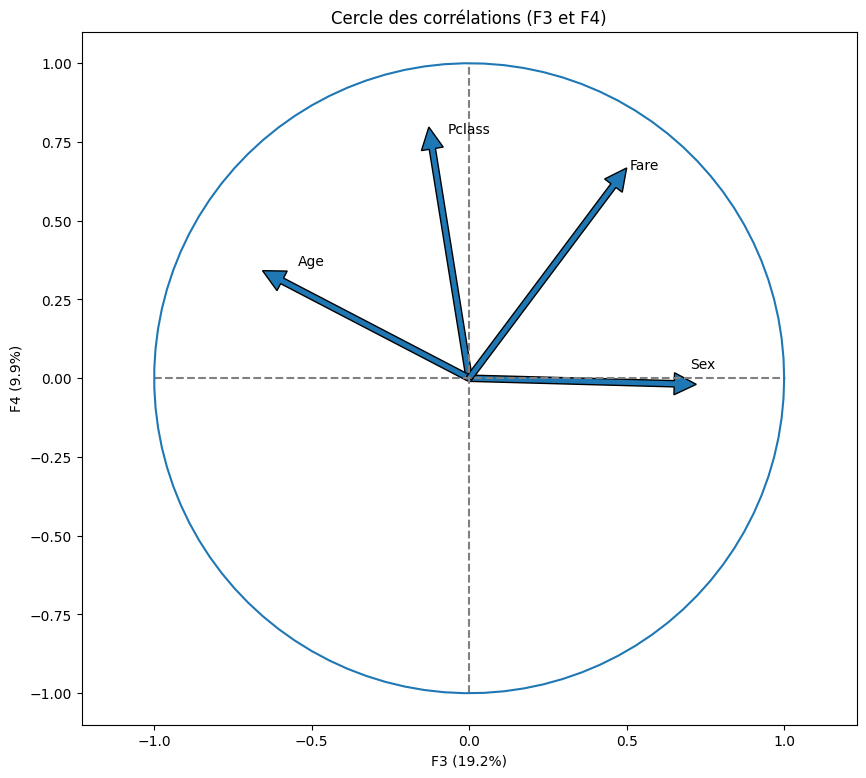

In [27]:
#le cercle de corrélation sur F3-F4
correlation_graph(pca, (2,3), X_scaled.columns)

In [17]:
#La fonction pour tracer les points sur le plan factoriel
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)
    #plt.legend(clusters, bbox_to_anchor=(1,1.02))

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

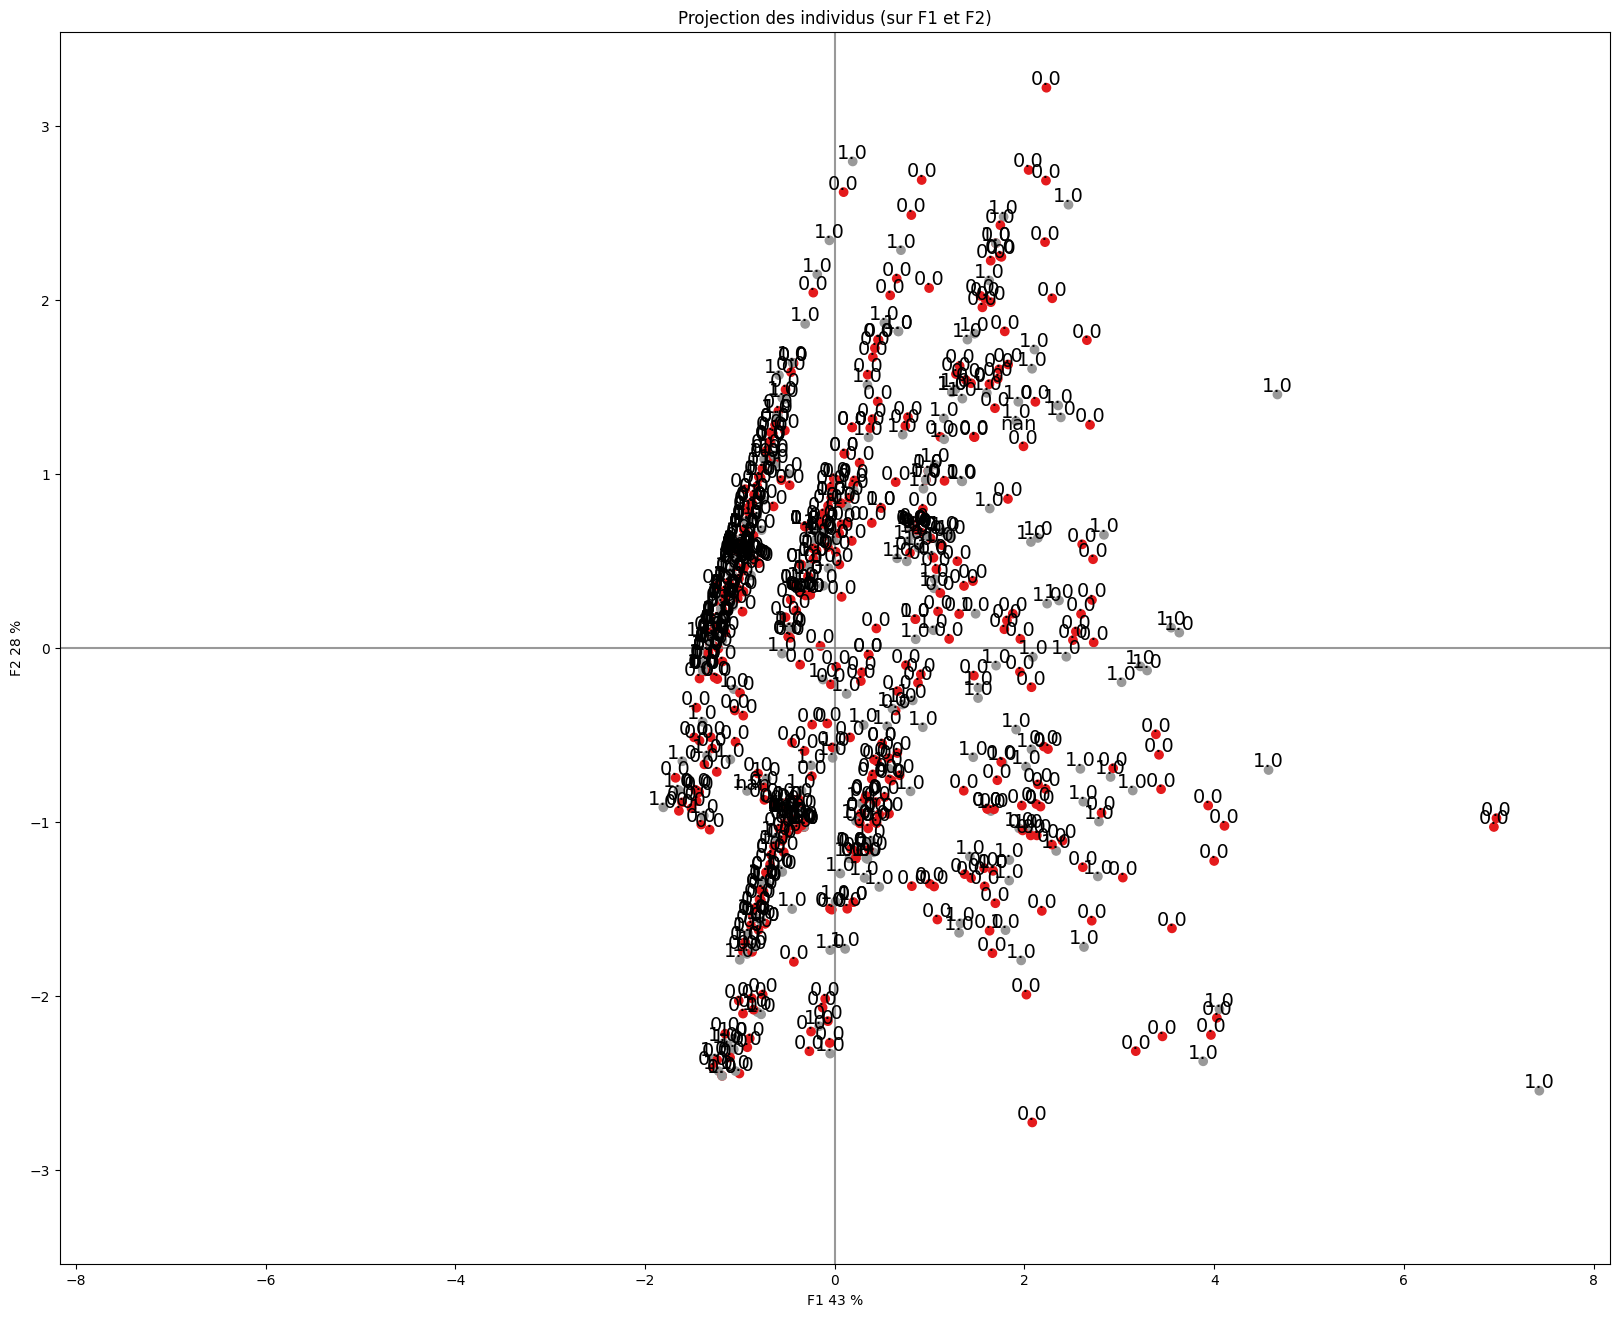

In [41]:
# Visualisation des points sur le plan factoriel F1-F2
X_proj = pca.transform(X_scaled)
x_y = [0,1]
names=df_scaled.index
display_factorial_planes(X_proj, x_y, pca, labels=list(df_scaled['Survived']),clusters=list(df_scaled['Survived']), figsize=(20,16), marker="o")

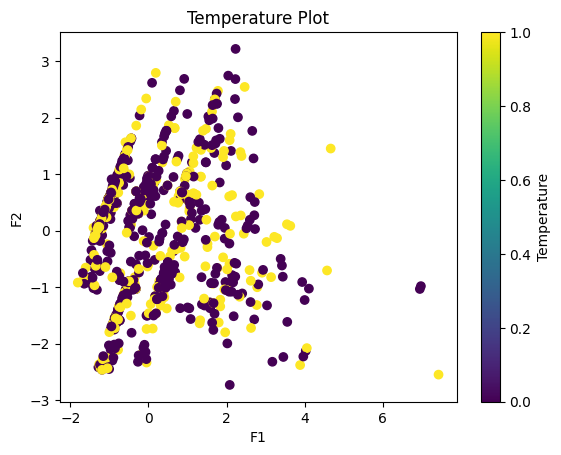

In [38]:
# Représentation des points sur le plan factoriel F1-F2 colorisés en fonction de 'payment_installments' ou 'review_score'

# Charger les données
data = np.array(X_proj)

# Extraire les colonnes pour les facteurs X et Y
X = data[:,0]
Y = data[:,1]

# Extraire la colonne des températures
temperatures = df_scaled.select_dtypes(exclude='object').Survived

# Définir la palette de couleur à utiliser
cmap = plt.get_cmap("viridis")

# Tracer les points sur un plan factoriel et les colorier en fonction des températures
sc = plt.scatter(X, Y, c=temperatures, cmap=cmap, vmin=0, vmax=1)

# Ajouter une barre de couleur pour montrer la correspondance des couleurs aux températures
cbar = plt.colorbar(sc)
cbar.set_label("Temperature")

# Ajouter une légende et des titres
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Temperature Plot")

# Afficher le plot
plt.show()

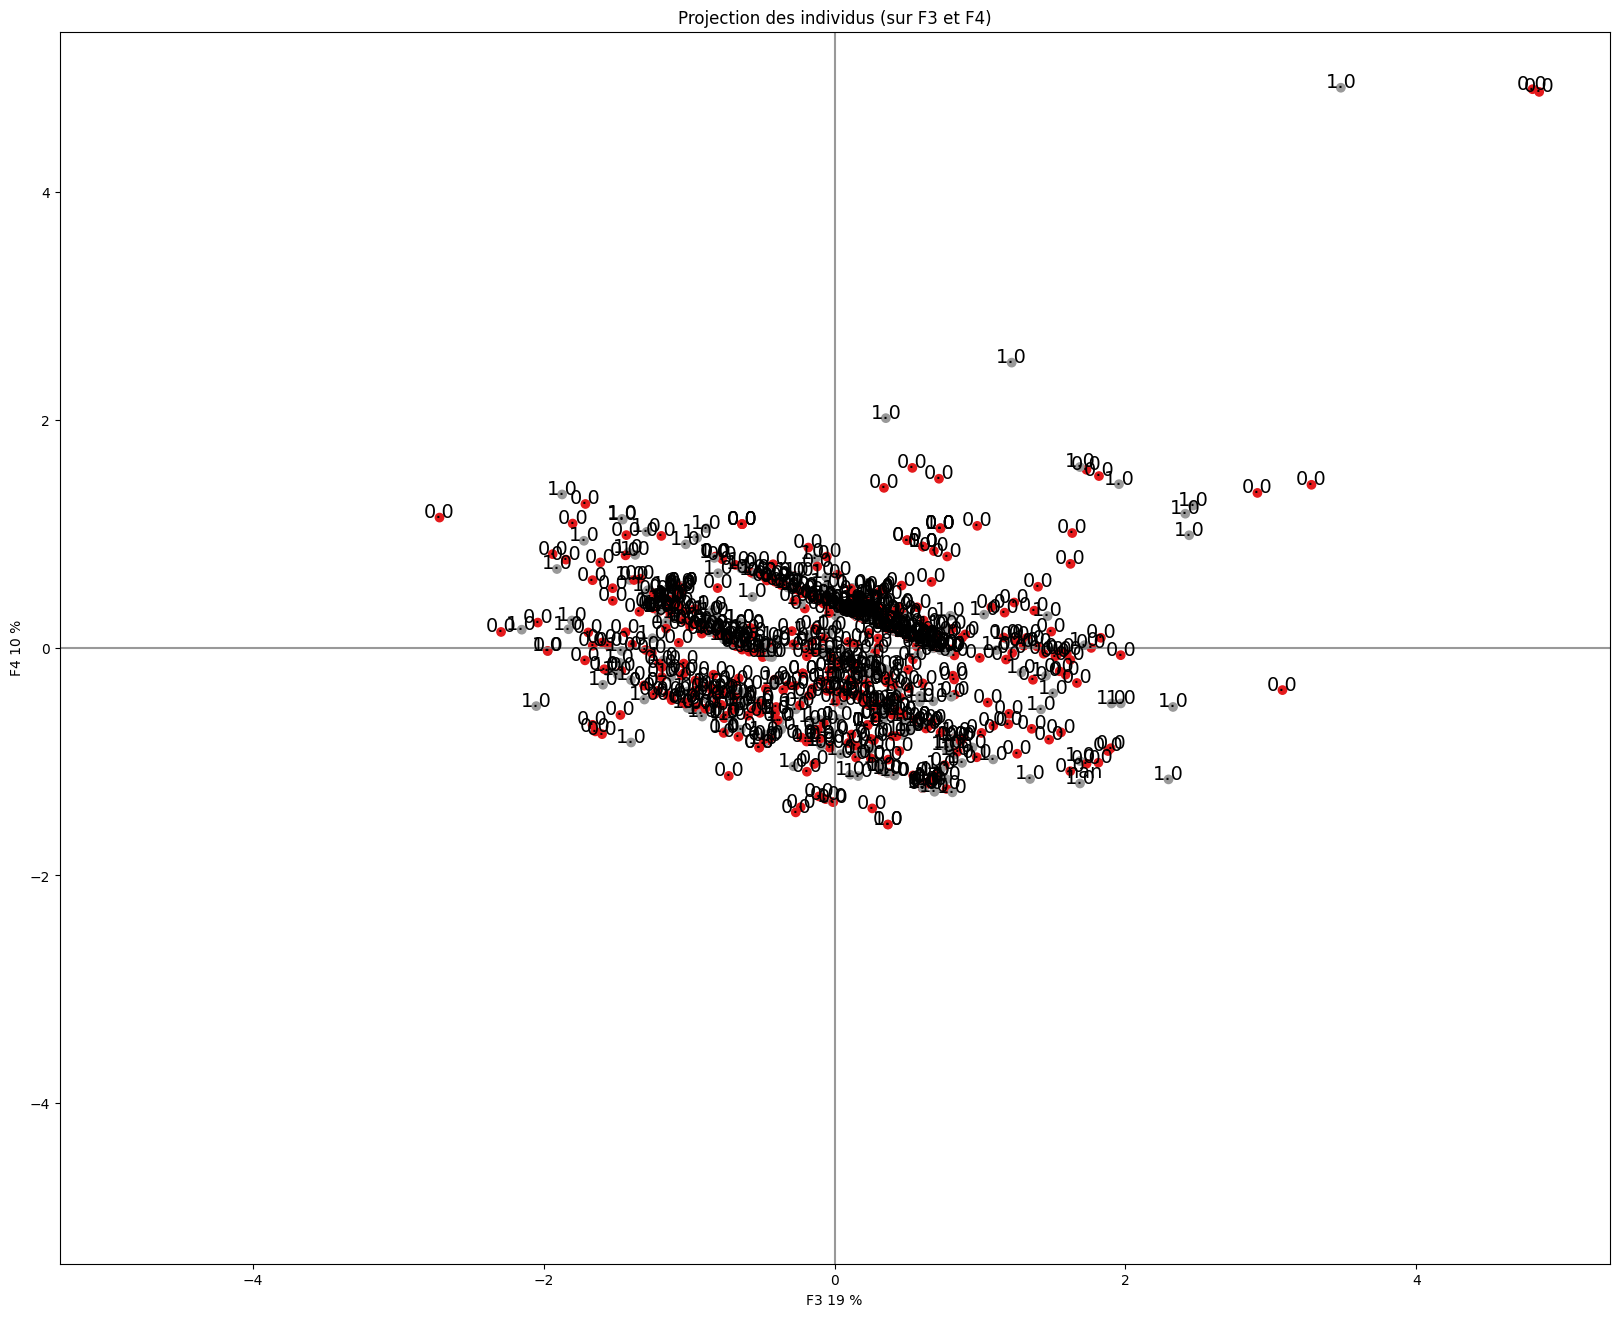

In [42]:
# Visualisation des points sur le plan factoriel F2-F3
x_y = [2,3]
names=X_scaled.index
display_factorial_planes(X_proj, x_y, pca, labels=list(df_scaled['Survived']), clusters=list(df_scaled['Survived']),figsize=(20,16), marker="o")

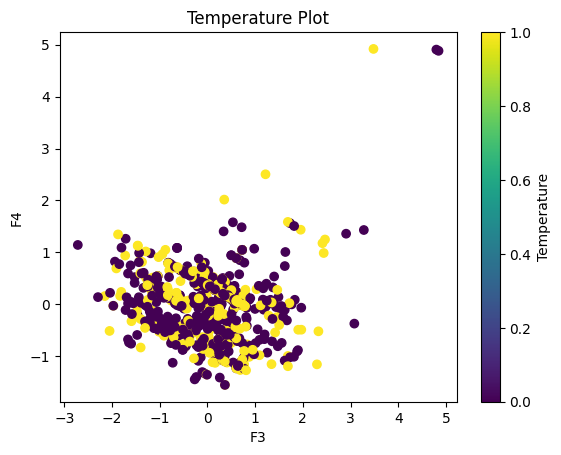

In [44]:
# Représentation des points sur le plan factoriel F1-F2 colorisés en fonction de 'payment_installments' ou 'review_score'

# Charger les données
data = np.array(X_proj)

# Extraire les colonnes pour les facteurs X et Y
X = data[:,2]
Y = data[:,3]

# Extraire la colonne des températures
temperatures = df_scaled.select_dtypes(exclude='object').Survived

# Définir la palette de couleur à utiliser
cmap = plt.get_cmap("viridis")

# Tracer les points sur un plan factoriel et les colorier en fonction des températures
sc = plt.scatter(X, Y, c=temperatures, cmap=cmap, vmin=0, vmax=1)

# Ajouter une barre de couleur pour montrer la correspondance des couleurs aux températures
cbar = plt.colorbar(sc)
cbar.set_label("Temperature")

# Ajouter une légende et des titres
plt.xlabel("F3")
plt.ylabel("F4")
plt.title("Temperature Plot")

# Afficher le plot
plt.show()